In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import mysql.connector

In [4]:
eda = mysql.connector.Connect(
    host = "database-1.c96mmei8egml.ap-northeast-2.rds.amazonaws.com",
    port = "3306",
    user = "eda_hb",
    password = "hb",
    database = "eda_project"
)
cursor = eda.cursor()

In [5]:
cursor.execute("SELECT matchId, teamId,deaths,win FROM match_data Group By matchId, teamId" )
result = cursor.fetchall()
for result_iterator in result:
    print(result_iterator)

('KR_6878880250', 100, 7, 0)
('KR_6878880250', 200, 7, 1)
('KR_6878810976', 100, 4, 0)
('KR_6878810976', 200, 5, 1)
('KR_6878746805', 100, 7, 1)
('KR_6878746805', 200, 10, 0)
('KR_6878687448', 100, 4, 1)
('KR_6878687448', 200, 4, 0)
('KR_6878608967', 100, 4, 0)
('KR_6878608967', 200, 3, 1)
('KR_6878518539', 100, 3, 0)
('KR_6878518539', 200, 8, 1)
('KR_6878446919', 100, 2, 1)
('KR_6878446919', 200, 5, 0)
('KR_6878297141', 100, 8, 0)
('KR_6878297141', 200, 3, 1)
('KR_6878254543', 100, 3, 0)
('KR_6878254543', 200, 5, 1)
('KR_6878206562', 100, 10, 0)
('KR_6878206562', 200, 3, 1)
('KR_6878185630', 100, 12, 0)
('KR_6878185630', 200, 3, 1)
('KR_6877720424', 100, 6, 0)
('KR_6877720424', 200, 4, 1)
('KR_6877653015', 100, 7, 0)
('KR_6877653015', 200, 6, 1)
('KR_6877582133', 100, 1, 0)
('KR_6877582133', 200, 2, 1)
('KR_6877497796', 100, 2, 0)
('KR_6877497796', 200, 2, 1)
('KR_6877438481', 100, 1, 1)
('KR_6877438481', 200, 2, 0)
('KR_6877348520', 100, 3, 0)
('KR_6877348520', 200, 4, 1)
('KR_687681

In [7]:
df = pd.DataFrame(result)
df.columns = ['matchId', 'teamId', 'deaths', 'win']
df.dropna(axis=0)
df.sort_values('deaths', ascending=False)

,matchId,teamId,deaths,win
9494,KR_6808114617,100.0,22.0,0.0
34838,KR_6871262335,100.0,21.0,0.0
42938,KR_6734005256,100.0,20.0,1.0
62439,KR_6784279523,100.0,20.0,0.0
32677,KR_6825588926,200.0,20.0,0.0
...,...,...,...,...
68932,KR_6852105583,NaN,NaN,NaN
69051,KR_6839745460,NaN,NaN,NaN
69054,KR_6839696498,NaN,NaN,NaN
69057,KR_6839668190,NaN,NaN,NaN


In [10]:
graph = df.groupby(['deaths']).apply(lambda x: x['win'].mean()).reset_index(name='win_rate')

graph

/tmp/ipykernel_4540/321569721.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  graph = df.groupby(['deaths']).apply(lambda x: x['win'].mean()).reset_index(name='win_rate')


,deaths,win_rate
0,0.0,0.848895
1,1.0,0.864822
2,2.0,0.757382
3,3.0,0.644884
4,4.0,0.550193
5,5.0,0.456873
6,6.0,0.377671
7,7.0,0.327634
8,8.0,0.306229
9,9.0,0.273172


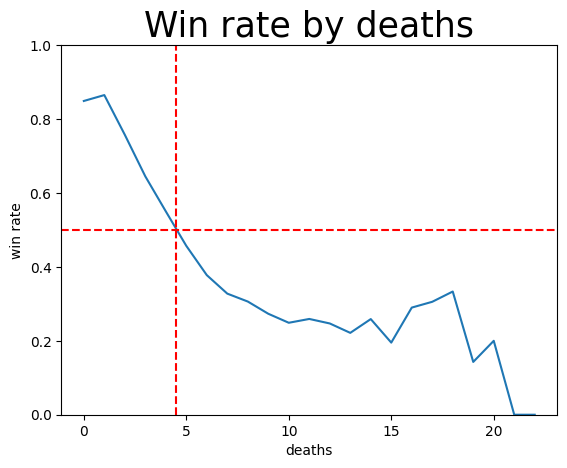

In [15]:
plt.plot(graph['deaths'], graph['win_rate'])
plt.title("Win rate by deaths", fontsize=25)
plt.xlabel("deaths")
plt.ylim(0, 1)
plt.ylabel("win rate")
plt.axhline(y=0.5, color='r', linestyle='--')
plt.axvline(x=4.5, color='r', linestyle='--')
plt.show()